In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [8]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [9]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [10]:
print("Year with minimal temperature is", df.groupby(df['Day'].dt.year).mean().idxmin().values[0])
print("Year with minimal temperature is", df.groupby(df['Day'].dt.year).mean().idxmax().values[0])

Year with minimal temperature is 2012
Year with minimal temperature is 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [15]:
jan = df[df['Day'].dt.month == 1]
jan_pos = jan[jan['t']>0]
print("Year is",jan_pos.groupby(jan_pos['Day'].dt.year).count().idxmax().Day)
print("Count of days is", jan_pos.groupby(jan_pos['Day'].dt.year).count().max().t)

Year is 2008
Count of days is 16


**3.** В каком году было самое холодное лето (по средней температуре)

In [13]:
spring = df[(df['Day'].dt.month == 6) | (df['Day'].dt.month == 7) | (df['Day'].dt.month == 8)]
print("The most cold summer was in", spring.groupby(spring['Day'].dt.year).mean().idxmin().t)

The most cold summer was in 2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [18]:
data = df.copy()
data['$\Delta$t'] = abs(data['t'].shift(1) - data['t'])
data.head()

,Day,t,$\Delta$t
0,2008-01-01,0,NaN
1,2008-01-02,-5,5.0
2,2008-01-03,-11,6.0
3,2008-01-04,-11,0.0
4,2008-01-05,-12,1.0


In [20]:
data[data['$\Delta$t'].idxmax():data['$\Delta$t'].idxmax()+1]

,Day,t,$\Delta$t
2335,2014-05-27,7,15.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

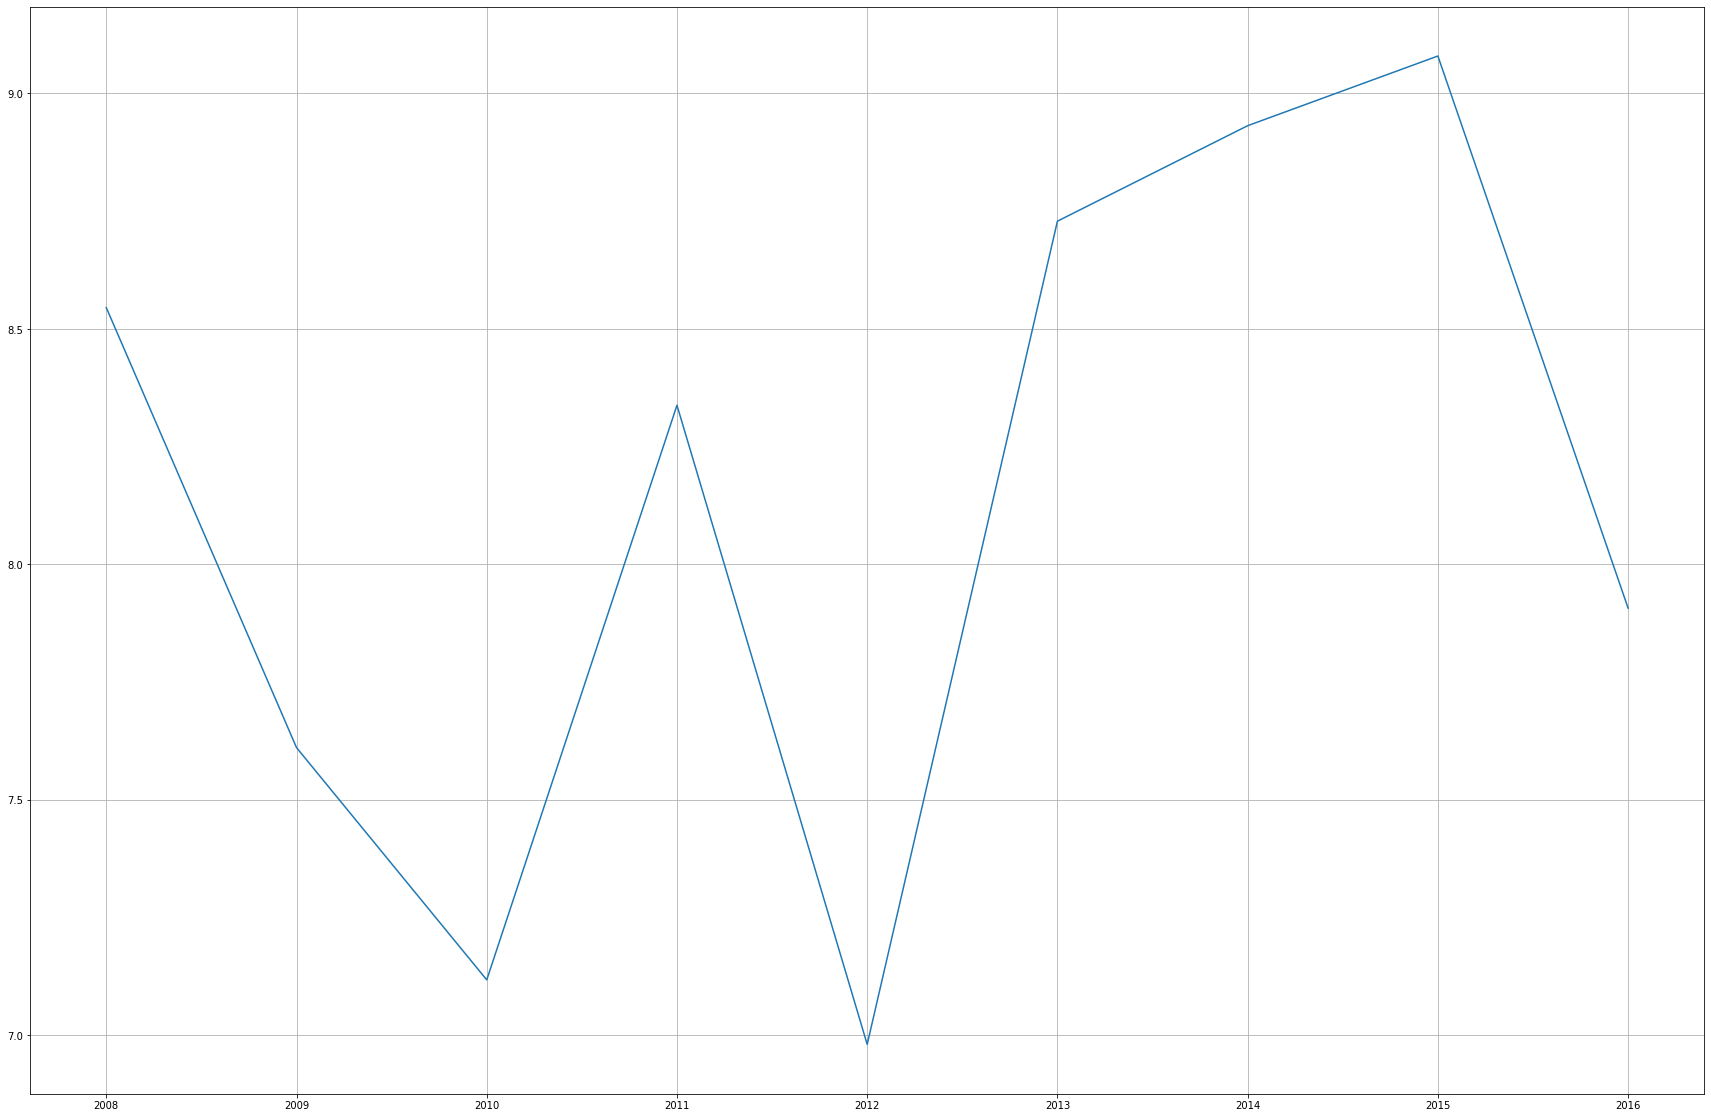

In [22]:
plt.figure(figsize=(30, 20))
plt.grid(True)
plt.plot(df.groupby(df['Day'].dt.year).mean());